In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Standarq
dScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore') 

## 1. Loading Data

In [3]:
prev_app = pd.read_csv('../dataset/previous_application.csv')
prev_app.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


In [4]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

In [5]:
prev_app.columns

Index(['SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'SK_ID_CURR'],
      dtype='object')

We'll create a dataframe filtered_previous_application which is just previous_application of SK_ID_CURR in application_train to see the correlation

In [6]:
app_train = pd.read_csv('../dataset/application_train.csv')
app_test = pd.read_csv('../dataset/application_test.csv')

In [7]:
print(f'The shape of previous_application.csv is: {prev_app.shape}')
print('-'*100)
print(f'Number of unique SK_ID_PREV in previous_application.csv are: {len(prev_app.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in previous_application.csv are: {len(prev_app.SK_ID_CURR.unique())}')
print('-'*100)
print(f'Number of overlapping SK_ID_CURR in application_train.csv and previous_application.csv are: {len(set(app_train.SK_ID_CURR.unique()).intersection(set(prev_app.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in application_test.csv and previous_application.csv are: {len(set(app_test.SK_ID_CURR.unique()).intersection(set(prev_app.SK_ID_CURR.unique())))}')
print('-'*100)
print(f'Number of duplicate values in previous_application: {prev_app.shape[0] - prev_app.duplicated().shape[0]}')
print('-'*100)
display(prev_app.head(5))

The shape of previous_application.csv is: (1413701, 37)
----------------------------------------------------------------------------------------------------
Number of unique SK_ID_PREV in previous_application.csv are: 1413701
Number of unique SK_ID_CURR in previous_application.csv are: 291057
----------------------------------------------------------------------------------------------------
Number of overlapping SK_ID_CURR in application_train.csv and previous_application.csv are: 232826
Number of overlapping SK_ID_CURR in application_test.csv and previous_application.csv are: 58231
----------------------------------------------------------------------------------------------------
Number of duplicate values in previous_application: 0
----------------------------------------------------------------------------------------------------


,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


### Comment
The table previous_application.csv consists of 1.41M rows in total. Each row corresponds to each of the previous loan that the client had with previously with Home Credit Group. It is possible for a single client of current application to have multiple previous loans with Home Credit Group

- There are 37 columns in previous_application.csv, which contain the details about the previous loan.
- There are 291k unique SK_ID_CURR in previous_application, of which 231k correspond to the application_train SK_ID_CURRs and 58.2k correspond to application_test SK_ID_CURRs.

In [8]:
filtered_prev_app = prev_app[prev_app['SK_ID_CURR'].isin(app_train['SK_ID_CURR'])]
filtered_prev_app.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587
5,2068863,Consumer loans,4830.930,47250.0,23688.0,24750.0,47250.0,THURSDAY,11,Y,1,0.556485,NaN,NaN,XAP,Approved,-619,Cash through the bank,XAP,Family,Repeater,Audio/Video,POS,XNA,Stone,110,Consumer electronics,6.0,high,POS household with interest,365243.0,-588.0,-438.0,-588.0,-580.0,0.0,91587
6,2551979,Consumer loans,6664.275,71352.0,71352.0,0.0,71352.0,WEDNESDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-1208,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Stone,108,Furniture,12.0,low_normal,POS industry with interest,365243.0,-1176.0,-846.0,-846.0,-840.0,0.0,91587
7,2517198,Revolving loans,11250.000,0.0,225000.0,NaN,NaN,TUESDAY,13,Y,1,NaN,NaN,NaN,XAP,Approved,-957,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Contact center,-1,XNA,0.0,XNA,Card X-Sell,-713.0,-673.0,365243.0,-461.0,-61.0,0.0,91587


In [9]:
mapping = dict(zip(app_train['SK_ID_CURR'], app_train['TARGET']))
filtered_prev_app['TARGET'] = filtered_prev_app['SK_ID_CURR'].map(mapping)

## 2. Processing

### a.About Data

In [10]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

In [11]:
prev_app.describe()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
count,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,1.413701e+06
mean,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,0.189436,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572,1.537647e+05
std,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,0.090849,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419,8.867392e+04
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000,0.000000e+00
25%,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000,7.692000e+04
50%,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,0.189136,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000,1.536860e+05
75%,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,0.193330,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000,2.305300e+05
max,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,3.075100e+05


### b.Check values

In [12]:
categorical_col = prev_app.select_dtypes('object').columns.to_list()
numerical_col = [col for col in prev_app.columns if col not in categorical_col and col not in ['SK_ID_CURR', 'SK_ID_PREV']]

### Comment
Ở previous_application có 1130891 dòng có ở application_train và còn lại 282810 dòng ở application_test.
Tuy nhiên thì có 291057 giá trị SK_ID_CURR ở previous_application trong khi đo có 246009 giá trị SK_ID_CURR ở applicaton_train.

1 SK_ID_CURR has many SK_ID_PREV and in previous_application has many same values SK_ID_CURR which is the same in application_train

**Some observation**:
- In `DAYS_FIRST_DRAWING`, `DAYS_FIRST_DUE`, `DAYS_LAST_DUE_1ST_VERSION`, `DAYS_LAST_DUE`, `DAYS_TERMINATION` has the datapoints of 365243 which is not normal. We'll fill that values with nan
- And some values maybe not too clear in some categorical variables
    - **XNA**: Not available and **XAP**: Not applicable should we consider as nan values?
    - `NAME_CASH_LOAN_PURPOSE`: 
        - Repairs, Car repairs: Nên group chung k?
        - Buying: Buying a used car, Buying a garage, Buying a new car, Buying a home, Buying a holiday home / land - Mức độ khác nhau
        - Building: Building a house or an annex 
        - Other, Refusal to name the goal, Urgent needs: Có phải là 1 vì mk k biết lí do và lượng tiền cần nhiều
        - Everyday expenses, medicine, education, Purchase of electronic equipment, Furniture, Gasification / water supply, Hobby, Money for a third person, Wedding / gift / holiday có giống với Journey?
        - Business development 
        - **Payments on other loans**

    - `NAME_TYPE_SUITE`: Other_B khác Other_A ở chỗ nào
    - `PRODUCT_COMBINATION`: Card X-Sell, Card Street không được phân loại thành high, low, middle


## 3. Univariate Analysis

### 3.1 Categorical Variables

In [13]:
for col in categorical_col:
    print(prev_app[col].value_counts(), '\n')

NAME_CONTRACT_TYPE
Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: count, dtype: int64 

WEEKDAY_APPR_PROCESS_START
WEDNESDAY    215519
TUESDAY      215058
MONDAY       214509
FRIDAY       213373
THURSDAY     211005
SATURDAY     204159
SUNDAY       140078
Name: count, dtype: int64 

FLAG_LAST_APPL_PER_CONTRACT
Y    1406387
N       7314
Name: count, dtype: int64 

NAME_CASH_LOAN_PURPOSE
XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment 

In [14]:
def plot_phik_matrix(data, categorical_columns, figsize = (20,20), mask_upper = True, tight_layout = True, 
                     linewidth = 0.1, fontsize = 10, cmap = 'Blues', show_target_top_corr = True, target_top_columns = 10):
    
    #first fetching only the categorical features
    data_for_phik = data[categorical_columns].astype('object')
    phik_matrix = data_for_phik.phik_matrix()
    
    print('-'*100)
    
    if mask_upper:
        mask_array = np.ones(phik_matrix.shape)
        mask_array = np.triu(mask_array)
    else:
        mask_array = np.zeros(phik_matrix.shape)
        
    plt.figure(figsize = figsize, tight_layout = tight_layout)
    sns.heatmap(phik_matrix, annot = False, mask = mask_array, linewidth = linewidth, cmap = cmap)
    plt.xticks(rotation = 90, fontsize = fontsize)
    plt.yticks(rotation = 0, fontsize = fontsize)
    plt.title("Phi-K Correlation Heatmap for Categorical Features")
    plt.show()
    print("-"*100)

    if show_target_top_corr:
        #Seeing the top columns with highest correlation with the target variable in application_train
        print("Categories with highest values of Phi-K Correlation value with Target Variable are:")
        phik_df = pd.DataFrame({'Column Name' : phik_matrix.TARGET.index[1:], 'Phik-Correlation' : phik_matrix.TARGET.values[1:]})
        phik_df = phik_df.sort_values(by = 'Phik-Correlation', ascending = False)
        display(phik_df.head(target_top_columns))
        print("-"*100) 

----------------------------------------------------------------------------------------------------


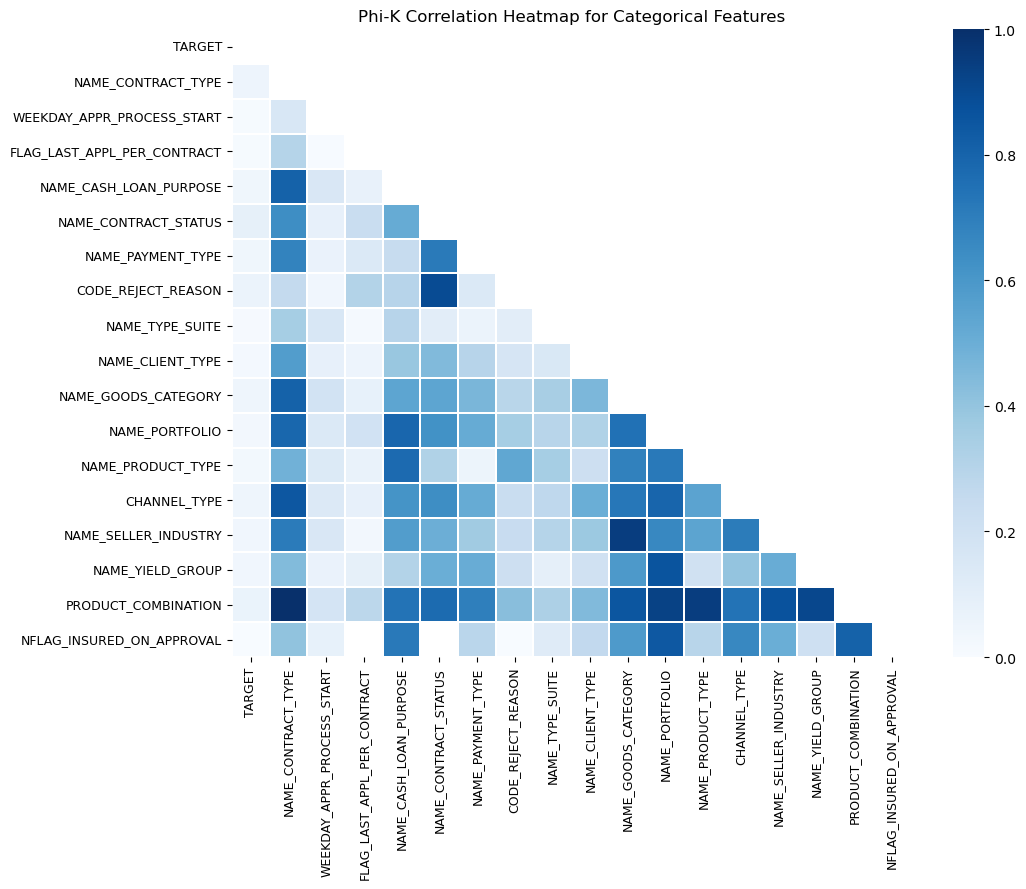

----------------------------------------------------------------------------------------------------
Categories with highest values of Phi-K Correlation value with Target Variable are:


,Column Name,Phik-Correlation
4,NAME_CONTRACT_STATUS,0.086879
15,PRODUCT_COMBINATION,0.064961
6,CODE_REJECT_REASON,0.061816
0,NAME_CONTRACT_TYPE,0.050952
12,CHANNEL_TYPE,0.049091
9,NAME_GOODS_CATEGORY,0.046869
3,NAME_CASH_LOAN_PURPOSE,0.040725
5,NAME_PAYMENT_TYPE,0.039151
13,NAME_SELLER_INDUSTRY,0.038537
14,NAME_YIELD_GROUP,0.035383


----------------------------------------------------------------------------------------------------


In [15]:
cols_for_phik = ['TARGET'] + filtered_prev_app.dtypes[filtered_prev_app.dtypes == 'object'].index.tolist() + ['NFLAG_INSURED_ON_APPROVAL']
plot_phik_matrix(filtered_prev_app, cols_for_phik, cmap = 'Blues', figsize = (11,9), fontsize = 9)

#### Comment:
1. Feature PRODUCT_COMBINATION tương quan mạnh với các feature như  NAME_CONTRACT_TYPE, NAME_PRODUCT_TYPE, NAME_PORTFOLIO,...
- NAME_GOODS_CATEGORY is also tương quan mạnh with NAME_SELLER_INDUSTRY
2. TARGET: tương quan mạnh với các feature như AME_CONTRACT_STATUS, PRODUCT_COMBINATION, CODE_REJECT_REASON -> điều tra kĩ các cột này

In [16]:
def print_unique_categories(data, column_name, show_counts = False):
    print('-'*100)
    print(f"The unique categories of '{column_name}' are:\n{data[column_name].unique()}")
    print('-'*100)
    
    if show_counts:
        print(f"Counts of each category are:\n{data[column_name].value_counts()}")
        print('-'*100)
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), percentage_display = True, plot_defaulter = True, rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)
    plt.show()

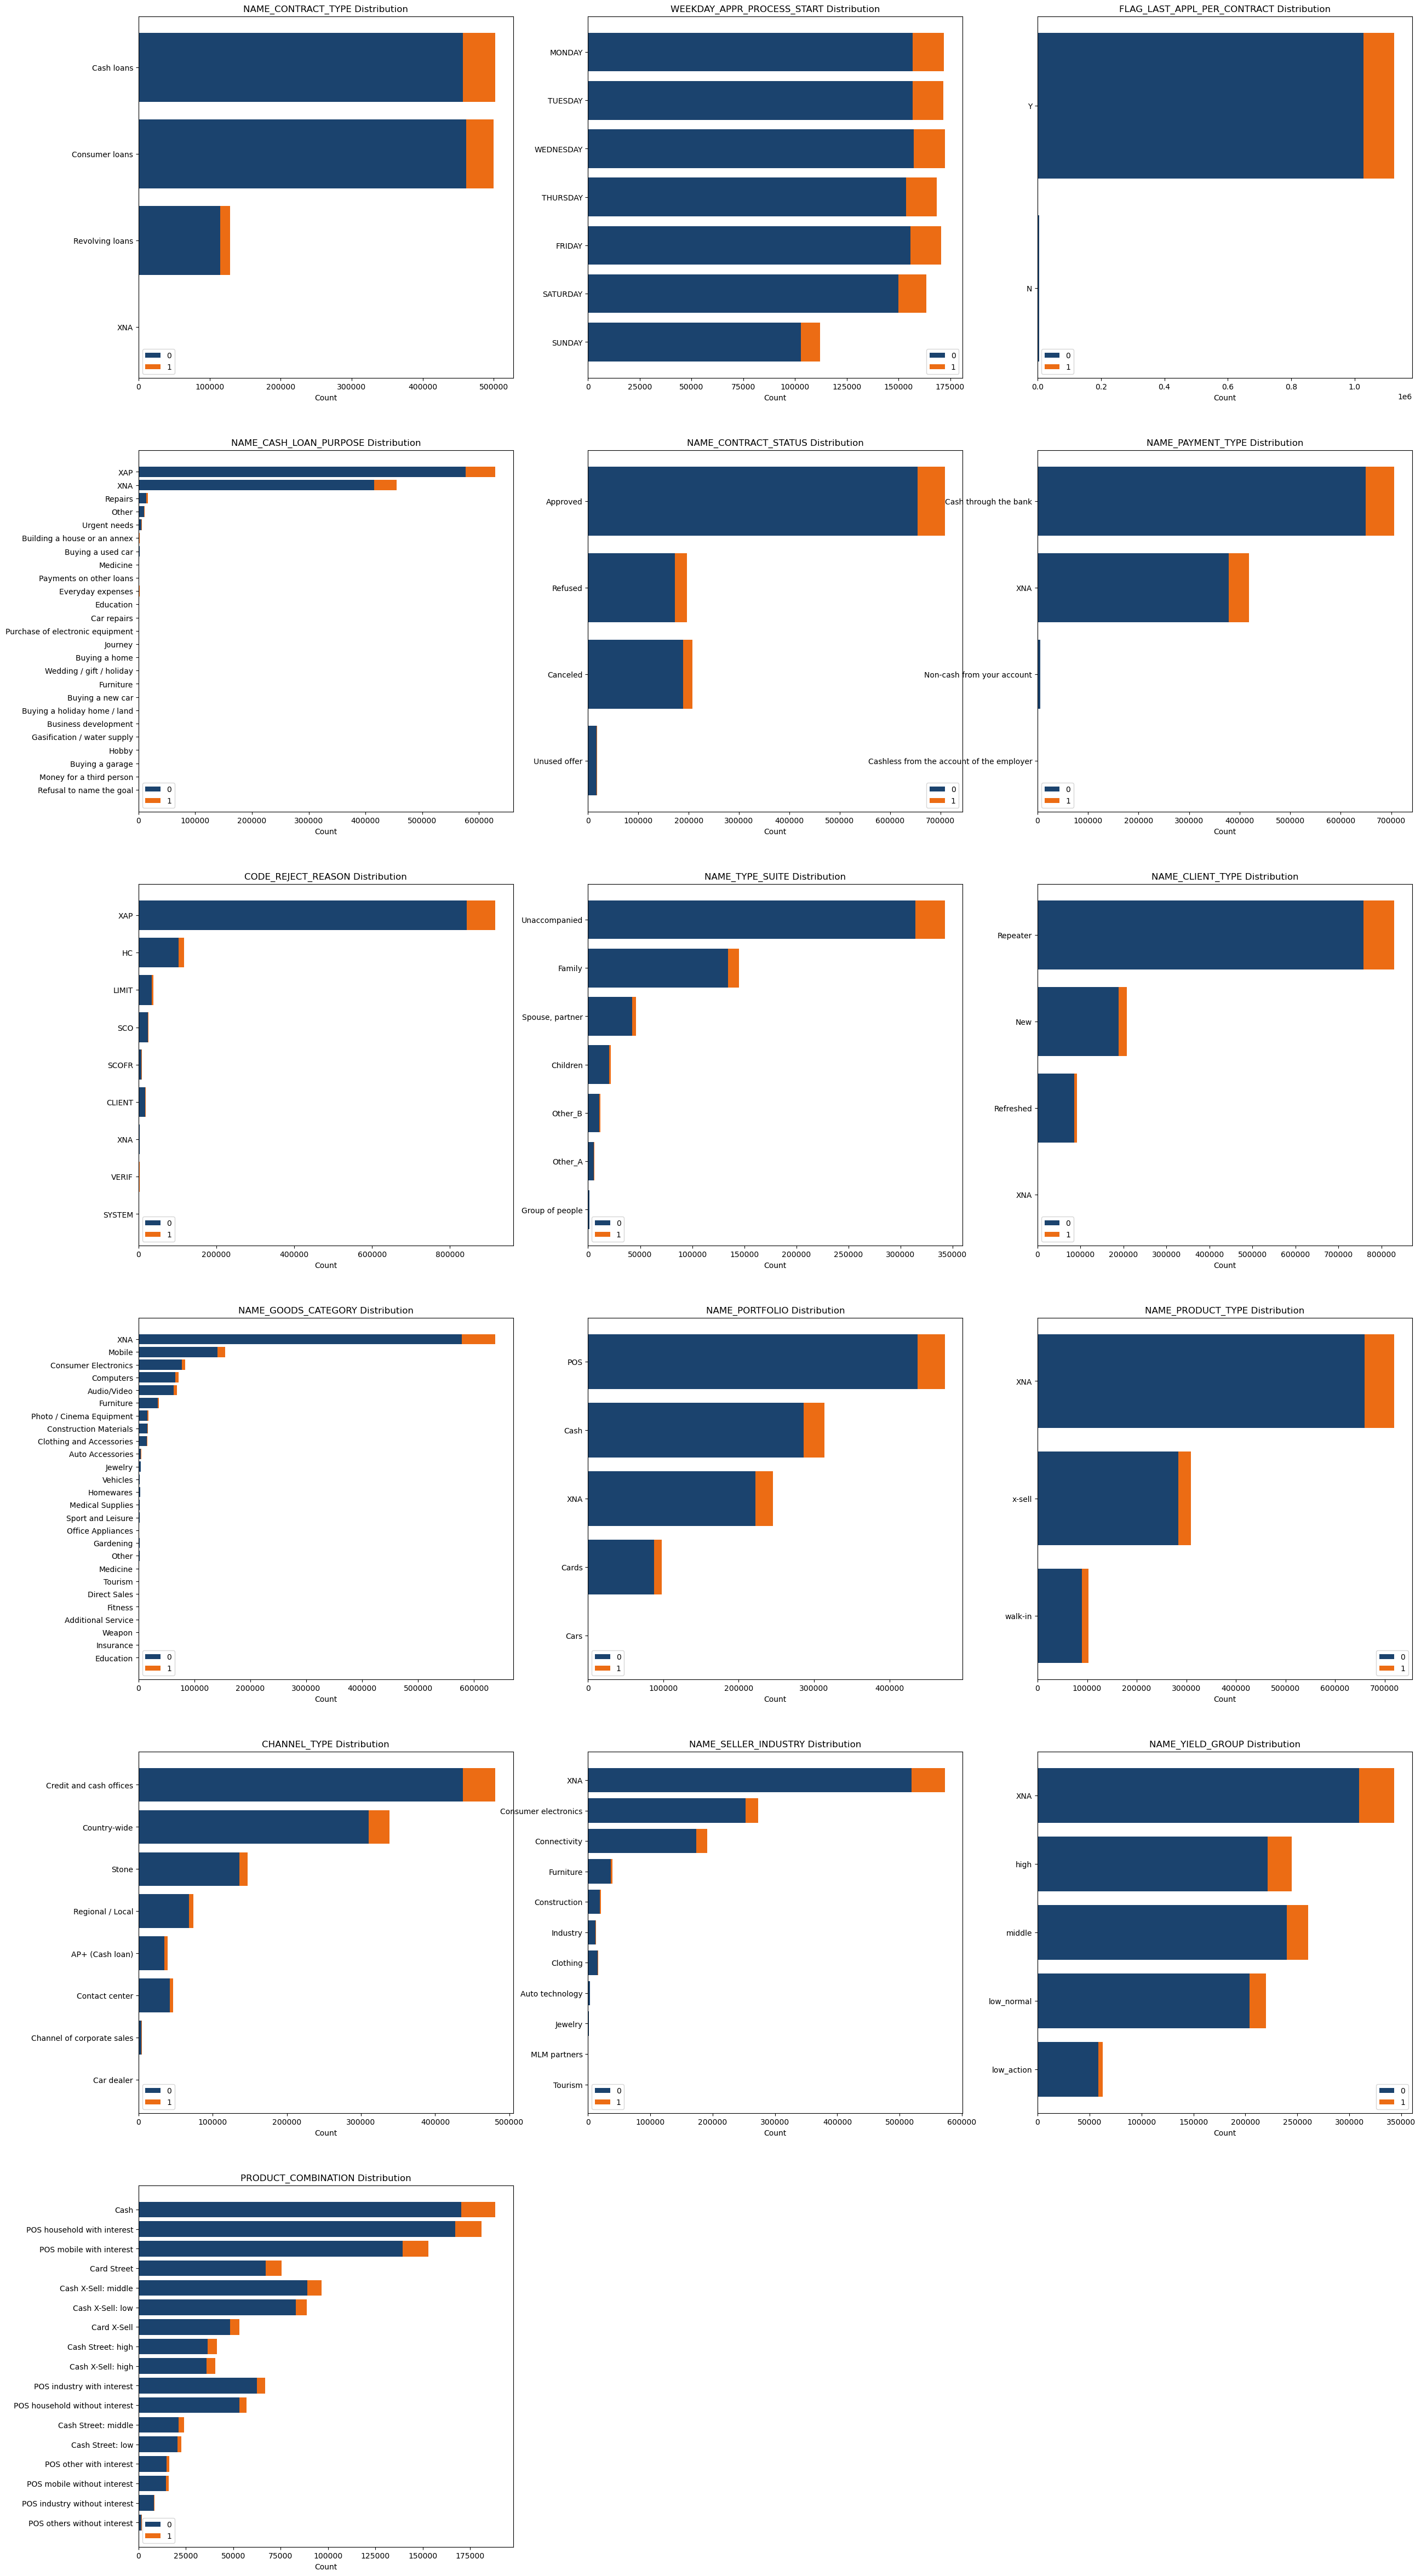

In [17]:
plt.figure(figsize=(30, 60))

for i, attr in enumerate(categorical_col, 1):
    plt.subplot(6, 3, i)
    data_group = filtered_prev_app.groupby([attr, 'TARGET']).size().reset_index(name='count')
    pivot_data = data_group.pivot(index=attr, columns='TARGET', values='count')
    pivot_data = pivot_data.sort_values(by=1)

    y = range(len(pivot_data))
    plt.barh(y, pivot_data[0], label='0', color='#1B436E')
    plt.barh(y, pivot_data[1], left=pivot_data[0], label='1', color='#EC6C14')

    plt.title(f'{attr} Distribution')
    plt.yticks(ticks=y, labels=pivot_data.index) 
    plt.xlabel('Count')
    # plt.ylabel(attr)
    plt.legend()

plt.show()

We will investigate some of the categorical features that seems important to the Target or has high correlation with each others

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_CONTRACT_TYPE' are:
['Cash loans' 'Consumer loans' 'Revolving loans' 'XNA']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_CONTRACT_TYPE = 4


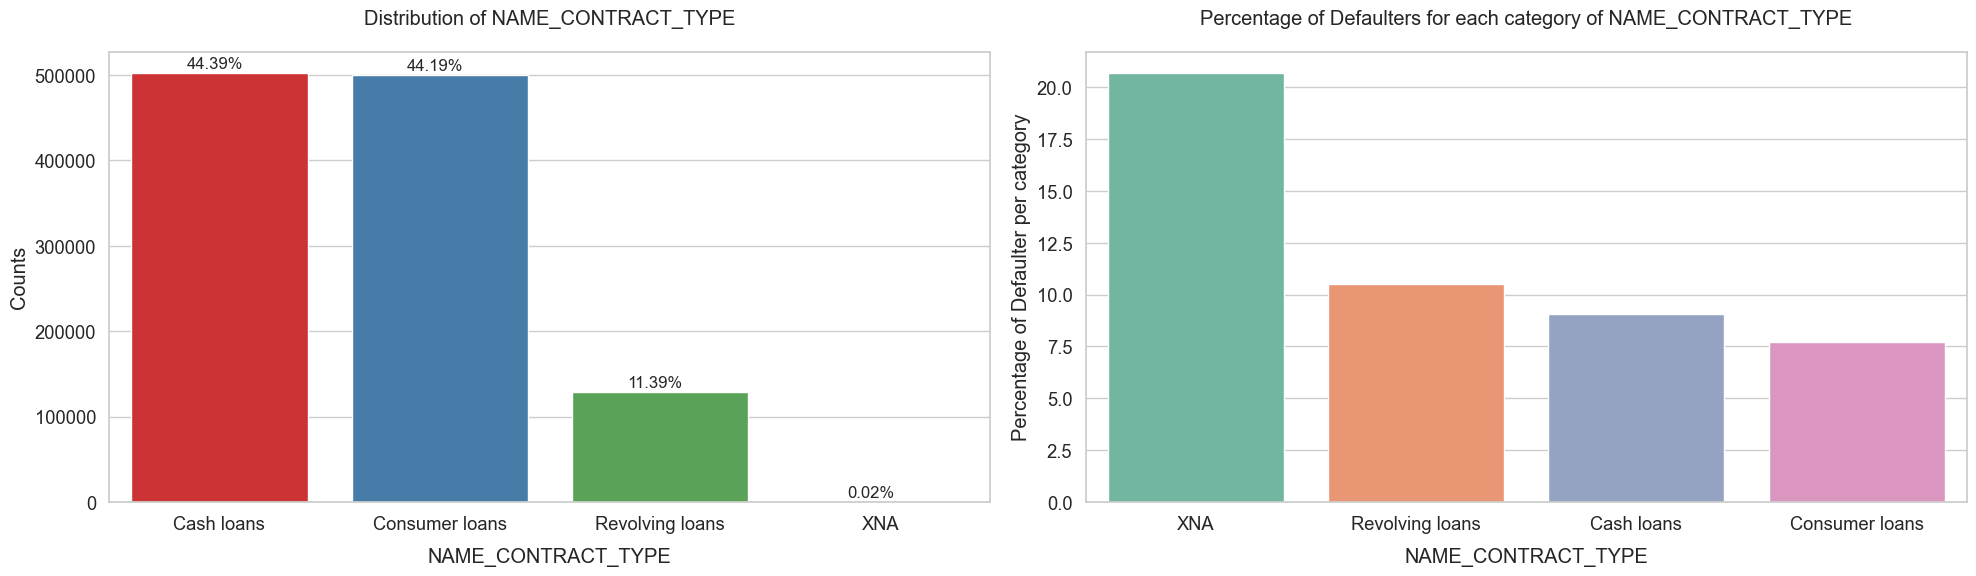

In [18]:
print_unique_categories(filtered_prev_app, 'NAME_CONTRACT_TYPE')
plot_categorical_variables_bar(filtered_prev_app, 'NAME_CONTRACT_TYPE', horizontal_adjust = 0.25, figsize = (20, 6), fontsize_percent = 'small')

#### Comment:


----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_CONTRACT_STATUS' are:
['Approved' 'Canceled' 'Refused' 'Unused offer']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_CONTRACT_STATUS = 4


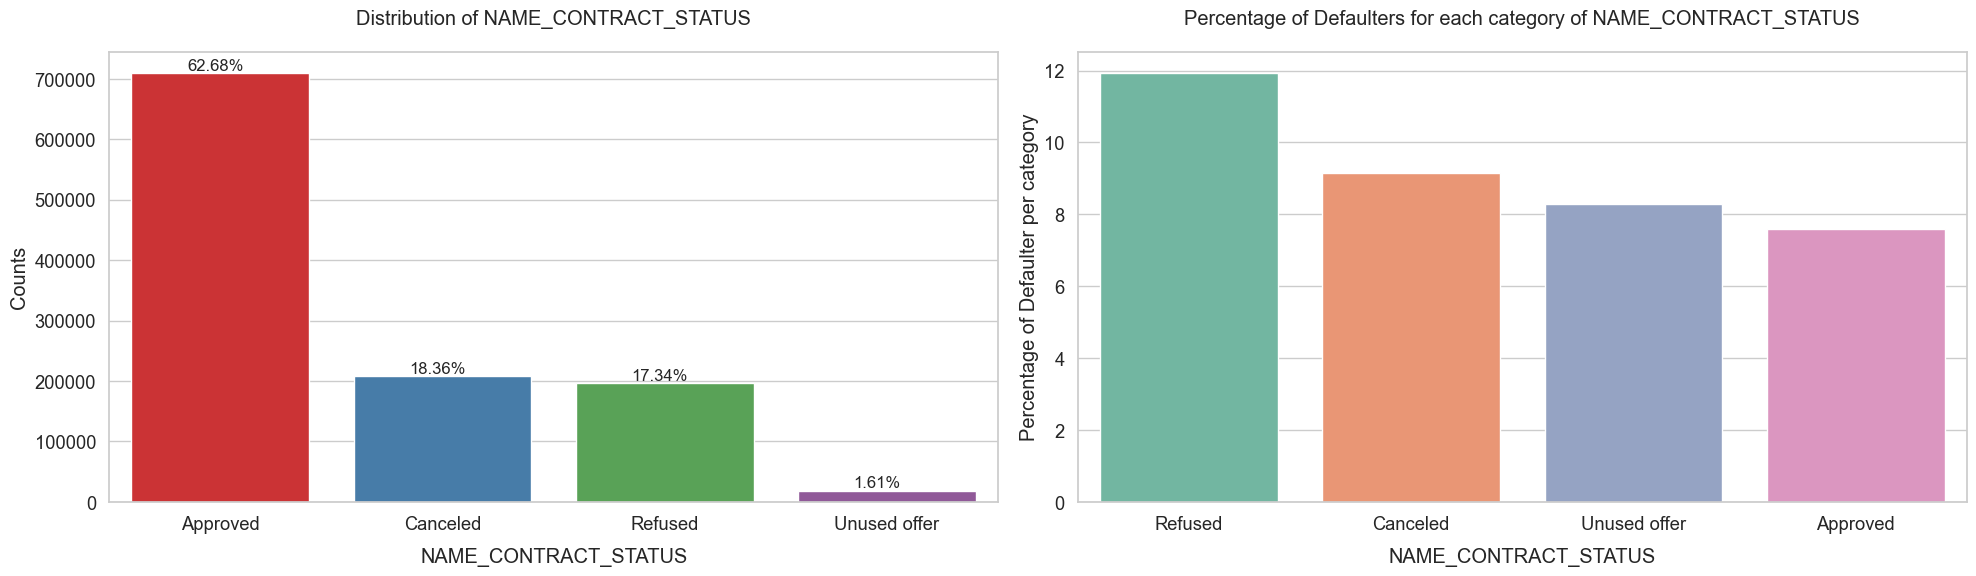

In [19]:
print_unique_categories(filtered_prev_app, 'NAME_CONTRACT_STATUS')
plot_categorical_variables_bar(filtered_prev_app, 'NAME_CONTRACT_STATUS', horizontal_adjust = 0.25, figsize = (20, 6), fontsize_percent = 'small')

#### Comment:
- Most common type of Contract Status is **Approved Status** (about 63%). Next is Canceled, Refused (~18%) -> Đa số khoản vay đều đc chấp thuận
- Percentage of Defaulter (Phần trăm người dùng ko trả đc nợ đúng hạn): Refused -> Defaulters cao nhất, Approved thấp nhất -> Khá hợp lý với logic

----------------------------------------------------------------------------------------------------
The unique categories of 'PRODUCT_COMBINATION' are:
['Cash X-Sell: low' 'POS household with interest'
 'POS industry with interest' 'Card X-Sell' 'Cash X-Sell: high'
 'Card Street' 'Cash' 'Cash X-Sell: middle' 'Cash Street: high'
 'POS household without interest' 'Cash Street: middle' 'Cash Street: low'
 'POS mobile with interest' 'POS other with interest'
 'POS industry without interest' 'POS mobile without interest' nan
 'POS others without interest']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of PRODUCT_COMBINATION = 18


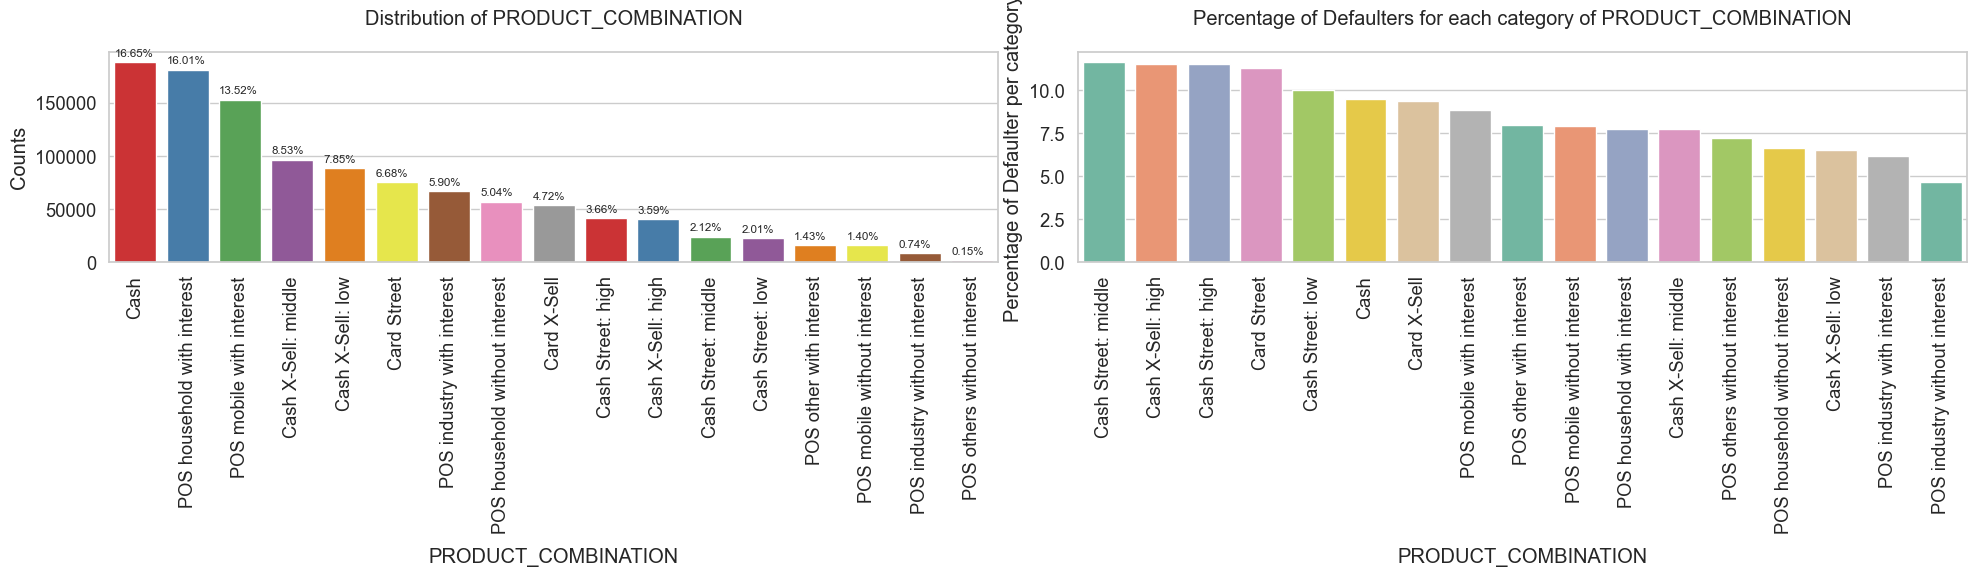

In [20]:
print_unique_categories(filtered_prev_app, 'PRODUCT_COMBINATION')
plot_categorical_variables_bar(filtered_prev_app, 'PRODUCT_COMBINATION', rotation = 90, figsize = (20, 6))

##### Comment:
- PRODUCT_COMBINATION: Sự kết hợp chi tiết của sản phẩm trong đơn vay trước
- 3 most common types of Product Combination: Cash, POS household with interest, POS mobile with interest. (50%)
- highest defaulting tendency among Cash Street: mobile category, Cash X-sell: high, Cash Street: high,  Card Street all 11-11.5% defaulters per category. 
- The lowest Percentage of Defaulters are in the POS Industry without interest Category (4.5% Defaulters.) 
- -> Các khoản vay POS trả trong doanh nghiệp có tỉ lệ thanh toán khoản vay tốt.
- Cash Street: low', 'Cash Street: middle', 'Cash Street: mobile' là phân nhóm của sản phẩm vay tiền mặt (Cash Loan) được phân loại theo lãi suất (low, middle,high) hoặc kênh phân phối (mobile)

----------------------------------------------------------------------------------------------------
The unique categories of 'CODE_REJECT_REASON' are:
['XAP' 'HC' 'SCO' 'LIMIT' 'CLIENT' 'XNA' 'VERIF' 'SCOFR' 'SYSTEM']
----------------------------------------------------------------------------------------------------
Counts of each category are:
CODE_REJECT_REASON
XAP       916498
HC        116812
LIMIT      38037
SCO        26096
CLIENT     18263
SCOFR       8697
XNA         3521
VERIF       2452
SYSTEM       515
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CODE_REJECT_REASON = 9


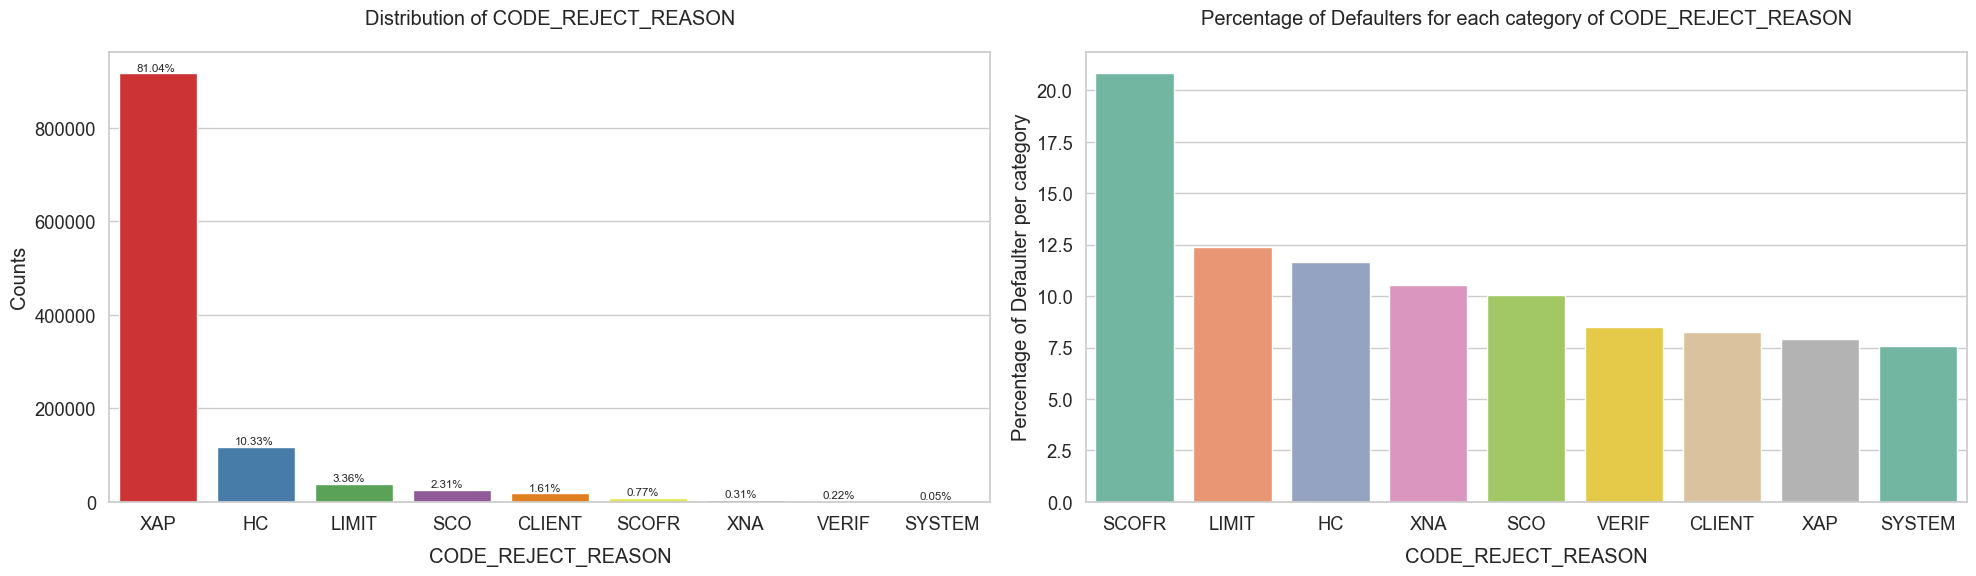

In [21]:
print_unique_categories(filtered_prev_app, 'CODE_REJECT_REASON', show_counts = True)
plot_categorical_variables_bar(filtered_prev_app, 'CODE_REJECT_REASON', horizontal_adjust = 0.18, figsize = (20, 6))

#### Comment: 
CODE_REJECT_REASON: Lý do từ chối đơn vay.
- Lý do từ chối cao nhất là XAP ~81%. Đây là lỗi trong đơn xin vay. (điền sai tên etc)
-  HC là lý do từ chối cao thứ 2 nhưng chỉ chiếm ~11%.  Đây là từ chối dolịch sử tín dụng với Home Credit không tốt hoặc không đủ, liên quan đến việc khách hàng có khoản vay trước đó chưa được thanh toán hoặc có nợ xấu.
- Distribution of percentage of defaulters for each category of CODE_REJECT_REASON 
    -  SCOFT have the highest percentage of Defaulters among them (~21%).  Đây là nx khách lừa đảo tín dụng hoặc thông tin không chính xác
    - LIMIT ( giới hạn tín dụng của khách hàng đã đạt mức tối đa)and HC which have around 12.5% and 12% of Defaulters 
    - XAP lại chỉ chiếm phần ít
-> XAP rất quan trọng, không nên drop hay thay thế nó bằng các giá trị khác

----------------------------------------------------------------------------------------------------
The unique categories of 'CHANNEL_TYPE' are:
['Contact center' 'AP+ (Cash loan)' 'Stone' 'Credit and cash offices'
 'Country-wide' 'Regional / Local' 'Channel of corporate sales'
 'Car dealer']
----------------------------------------------------------------------------------------------------
Counts of each category are:
CHANNEL_TYPE
Credit and cash offices       480984
Country-wide                  338471
Stone                         146793
Regional / Local               73674
Contact center                 46893
AP+ (Cash loan)                39561
Channel of corporate sales      4202
Car dealer                       313
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CHANNEL_TYPE = 8


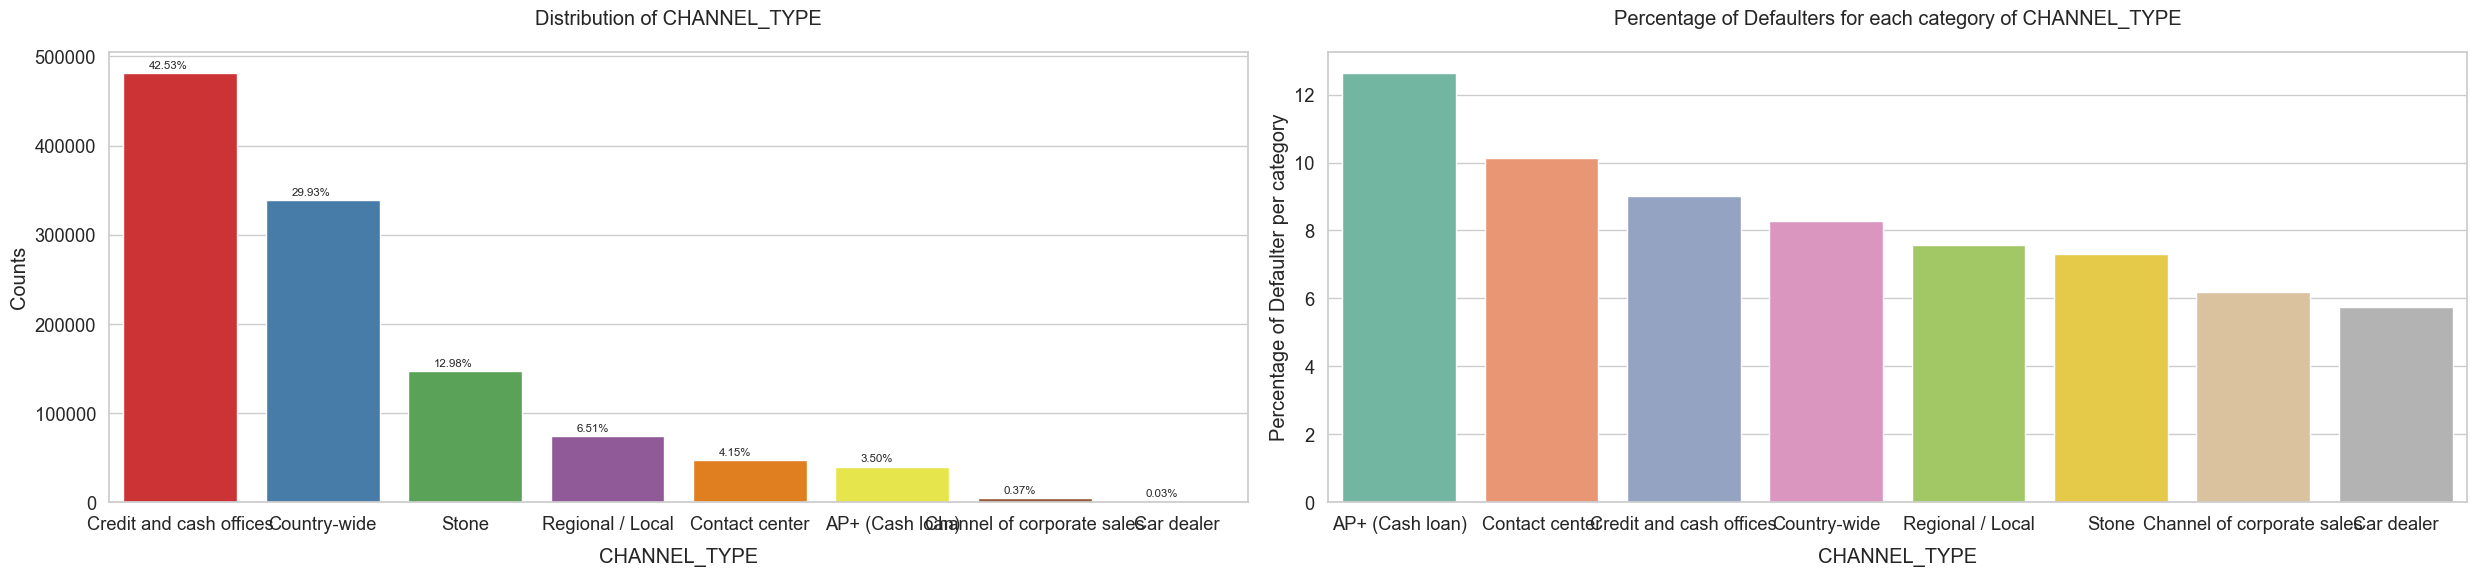

In [22]:
print_unique_categories(filtered_prev_app, 'CHANNEL_TYPE', show_counts = True)
plot_categorical_variables_bar(filtered_prev_app, 'CHANNEL_TYPE', horizontal_adjust = 0.18, figsize = (25, 6))

#### Comment
- CHANNEL_TYPE: Kênh mà khách hàng sử dụng để nộp đơn
- Chủ yếu khách app qua Credit and cash offices (42.47%)applications, Country-wide (29.93%) applications. Xem xét gộp các kênh còn lại với nhau? 
- Highest Defaulting Percentage là AP+ (Cash Loan), đây là  một chương trình vay tiền mặt với các điều kiện đặc biệt (chẳng hạn như lãi suất ưu đãi, các đặc quyền hay hỗ trợ tài chính cho khách hàng có nhu cầu cao hơn bình thường). Tuy vậy đây lại là kênh có số lượng Defaulter cao hơn những loại khác

### 3.2 Continuous Variables

In [23]:
cols_for_corr = ['TARGET','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']

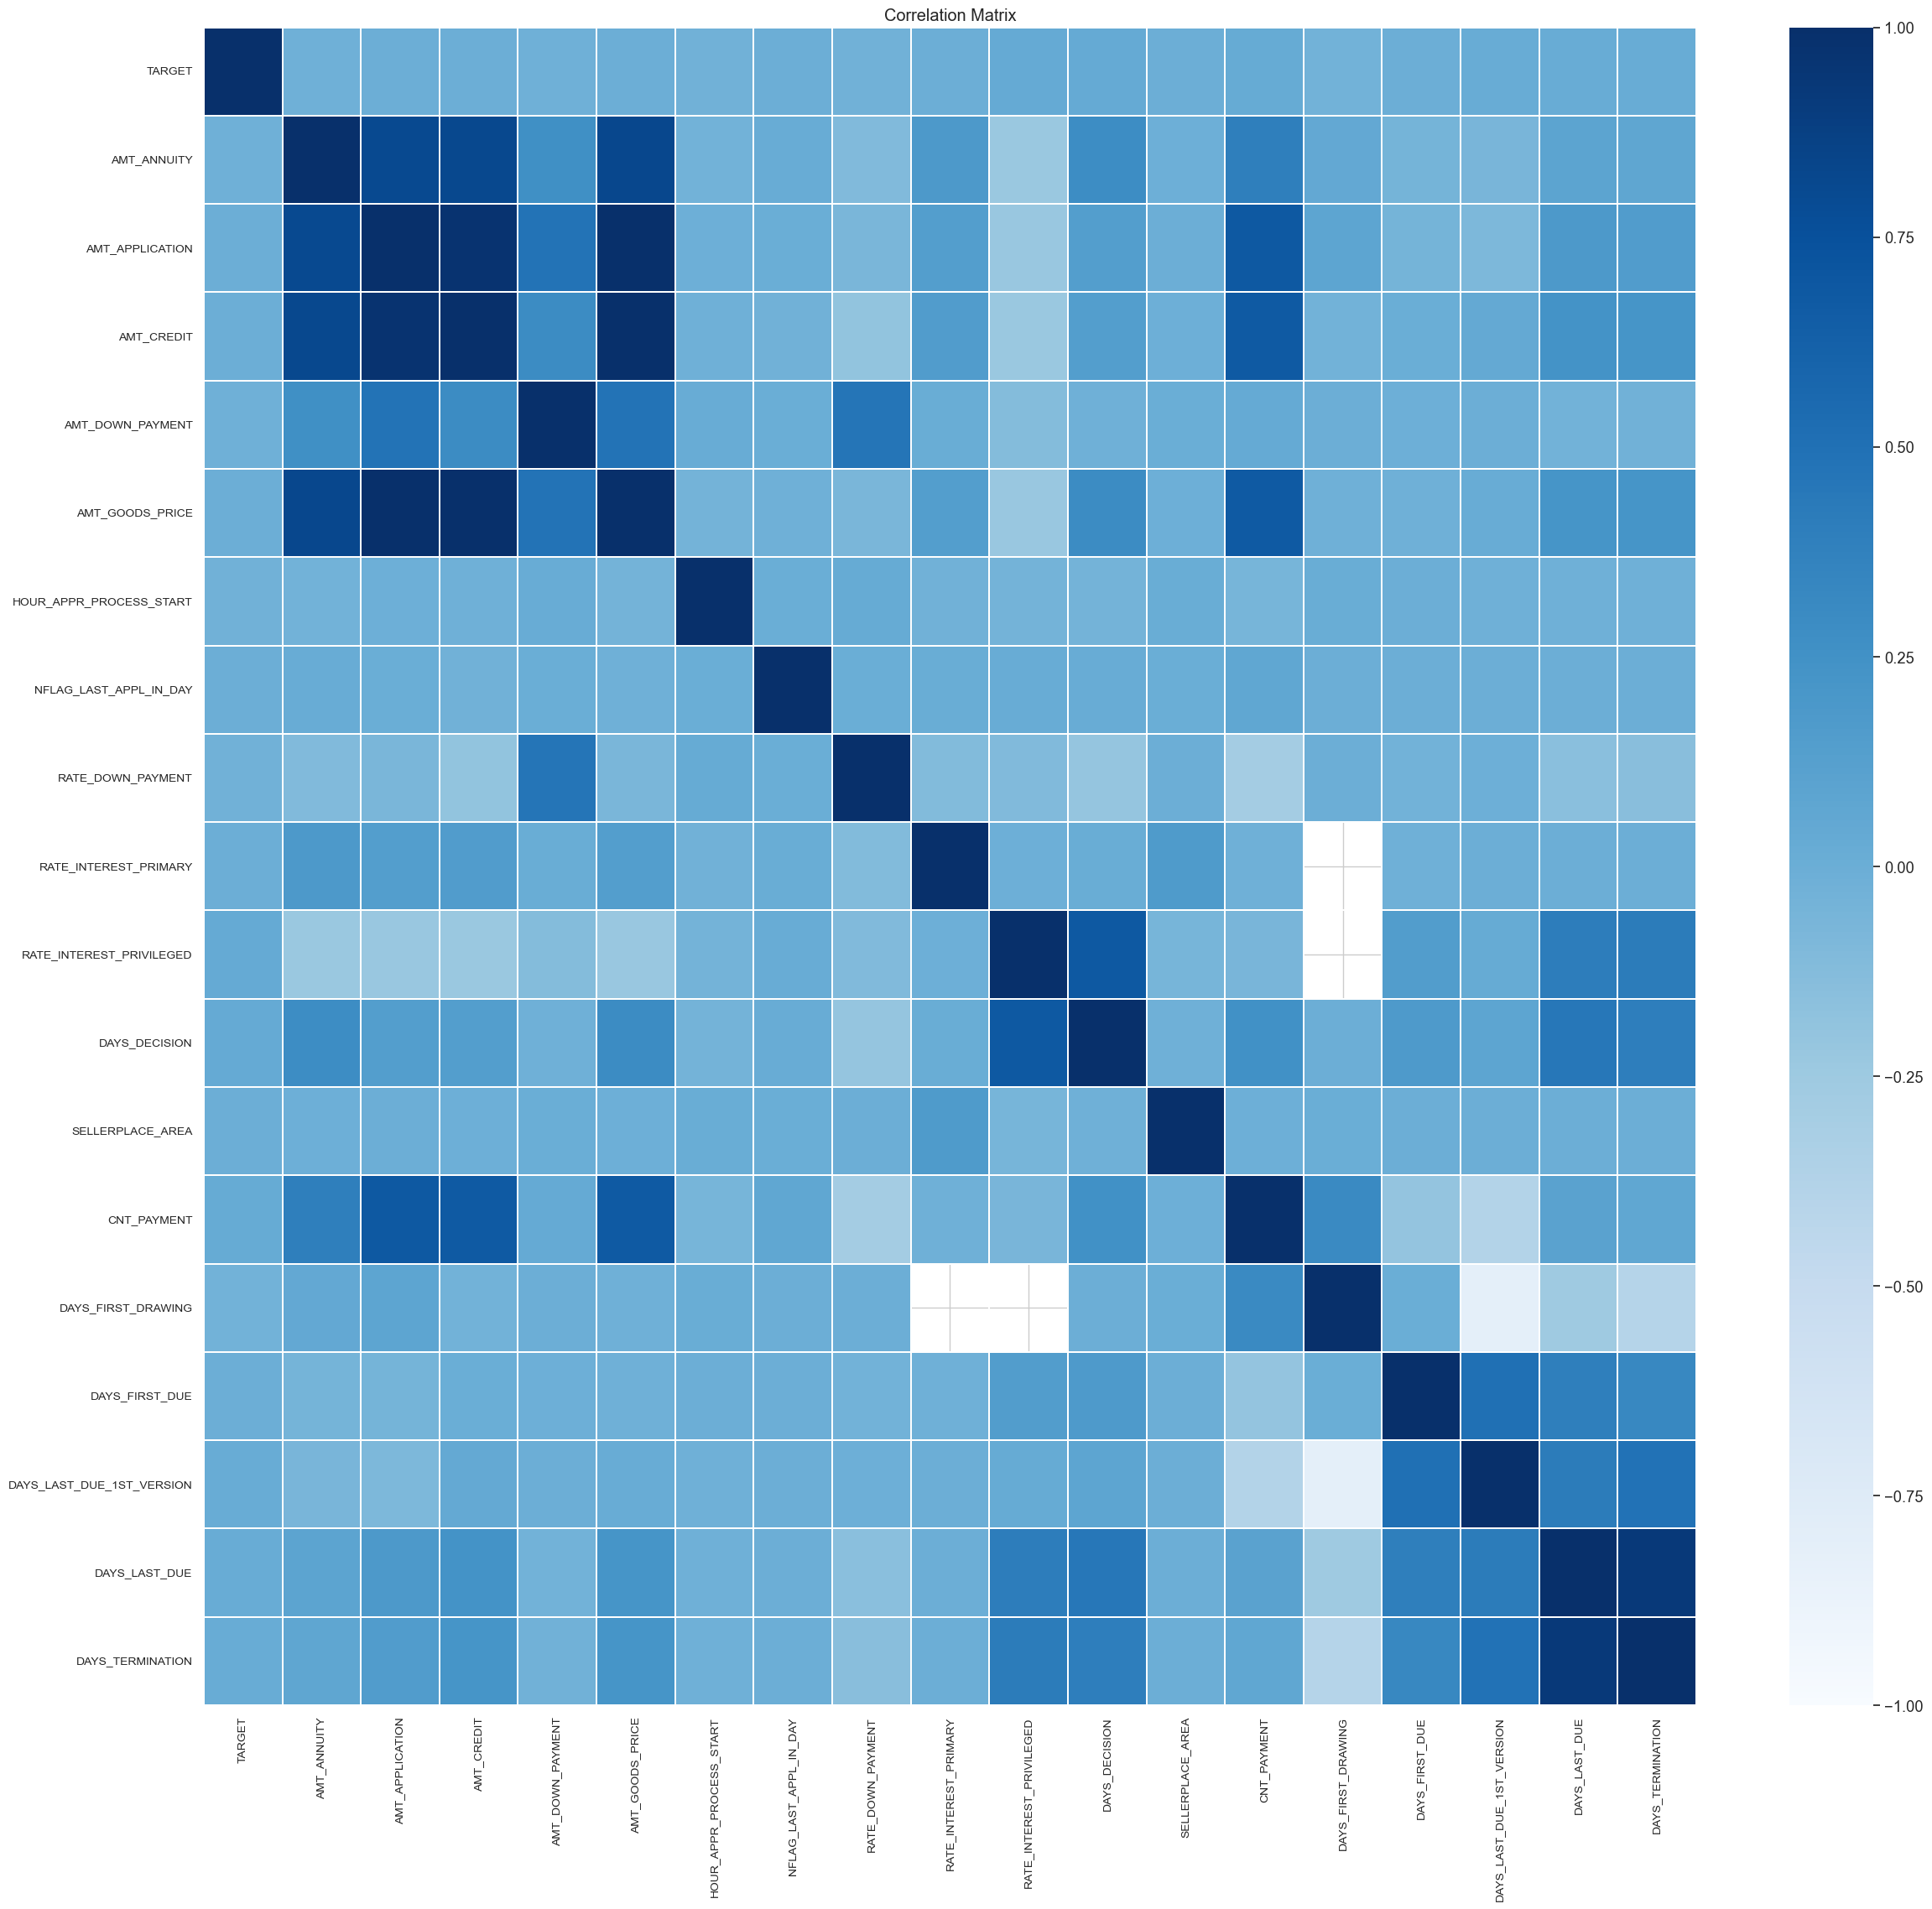

In [24]:
def correlation_matrix(data, columns_to_include, cmap='Blues', figsize=(25, 23)):
    data_filtered = data[columns_to_include]
    numeric_data = data_filtered.select_dtypes(include=['number', 'float', 'int'])
    corr_data = numeric_data.corr()
    plt.figure(figsize=figsize, tight_layout = True)
    sns.heatmap(corr_data, annot=False, cmap=cmap, vmin=-1, vmax=1, linewidths=0.1)
    plt.xticks(rotation = 90, fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.title("Correlation Matrix")
    plt.show()
    return corr_data

corr_mat = correlation_matrix(filtered_prev_app, cols_for_corr, cmap='Blues')

In [25]:
print(corr_mat['TARGET'].sort_values(ascending=False))

TARGET                       1.000000
DAYS_DECISION                0.038339
RATE_INTEREST_PRIVILEGED     0.035750
CNT_PAYMENT                  0.029390
DAYS_LAST_DUE_1ST_VERSION    0.018618
DAYS_LAST_DUE                0.017144
DAYS_TERMINATION             0.016753
AMT_GOODS_PRICE             -0.000825
SELLERPLACE_AREA            -0.002416
AMT_CREDIT                  -0.003224
NFLAG_LAST_APPL_IN_DAY      -0.003340
RATE_INTEREST_PRIMARY       -0.003778
AMT_APPLICATION             -0.006511
DAYS_FIRST_DUE              -0.007245
AMT_ANNUITY                 -0.015795
AMT_DOWN_PAYMENT            -0.016336
RATE_DOWN_PAYMENT           -0.025337
HOUR_APPR_PROCESS_START     -0.025866
DAYS_FIRST_DRAWING          -0.032117
Name: TARGET, dtype: float64


##### Comment:

- highly correlated features which have a darker colour
    - DAYS_TERMINATION and DAYS_LAST_DUE
    - AMT_CREDIT and AMT_APPLICATION
    - AMT_APPLICATION and AMT_GOODS_PRICE
    - AMT_CREDIT and AMT_ANNUITY
    - AMT_ANNUITY and AMT_CREDIT
    - AMT_CREDIT and AMT_GOODS_PRICE
- -> Create New Features from this 
- The features don't particularly show good/high correlation with Target as such. No direct linear relation between Target and the features

Label encoding: FLAG_LAST_APPL_PER_CONTRACT


In [26]:
num_bar_chart1 = [
    'NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL'
]

num_bar_chart2 = [
    'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 
    'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'HOUR_APPR_PROCESS_START'
]

num_line = [
    'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'
]

num_boxplot = [
    'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'
]

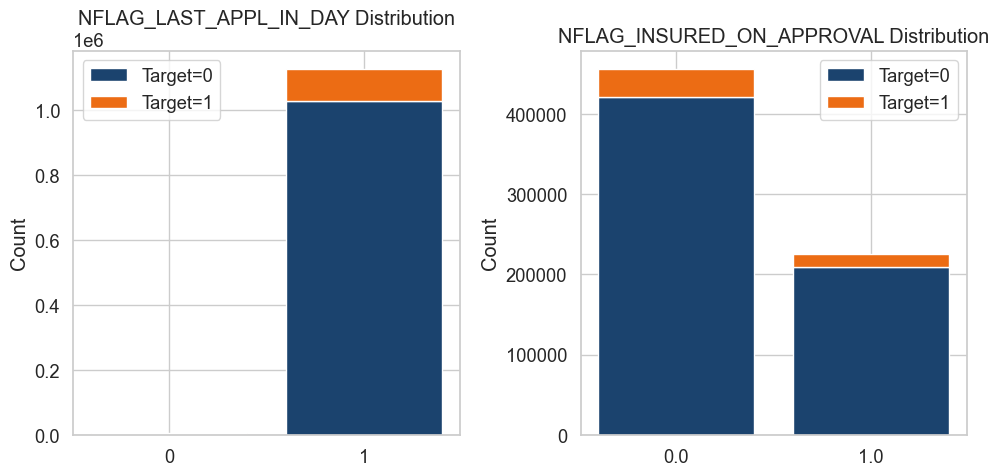

In [27]:
plt.figure(figsize=(10, 5))

for i, attr in enumerate(num_bar_chart1, 1):
    plt.subplot(1, 2, i)
    data_group = filtered_prev_app.groupby([attr, 'TARGET']).size().reset_index(name='count')
    pivot_data = data_group.pivot(index=attr, columns='TARGET', values='count')
    # pivot_data = pivot_data.sort_values(by=1)

    x = range(len(pivot_data))
    plt.bar(x, pivot_data[0], label='Target=0', color='#1B436E')
    plt.bar(x, pivot_data[1], bottom=pivot_data[0], label='Target=1', color='#EC6C14')

    plt.title(f'{attr} Distribution')
    plt.xticks(ticks=x, labels=pivot_data.index) 
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

#### Comment: No clear insights

In [28]:
filtered_prev_app[['DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 
    'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'HOUR_APPR_PROCESS_START']].describe()

,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,HOUR_APPR_PROCESS_START
count,1.130891e+06,1.130891e+06,885181.000000,681997.000000,681997.000000,681997.000000,681997.000000,681997.000000,1.130891e+06
mean,-8.803154e+02,3.167315e+02,16.059598,342301.940778,13518.040311,33273.213668,76673.940679,82369.458267,1.247646e+01
std,7.836524e+02,7.701097e+03,14.567409,88752.823666,71719.061318,106158.731994,149710.383025,153547.443929,3.330394e+00
min,-2.922000e+03,-1.000000e+00,0.000000,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000e+00
25%,-1.313000e+03,-1.000000e+00,6.000000,365243.000000,-1630.000000,-1244.000000,-1315.000000,-1269.000000,1.000000e+01
50%,-5.820000e+02,4.000000e+00,12.000000,365243.000000,-825.000000,-357.000000,-534.000000,-494.000000,1.200000e+01
75%,-2.710000e+02,8.500000e+01,24.000000,365243.000000,-407.000000,135.000000,-73.000000,-42.000000,1.500000e+01
max,-1.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,2.300000e+01


#### Comment:
- Days columns có các giá trị sai (365243 ngày??) -> drop 

In [29]:
# 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 
# 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'HOUR_APPR_PROCESS_START'

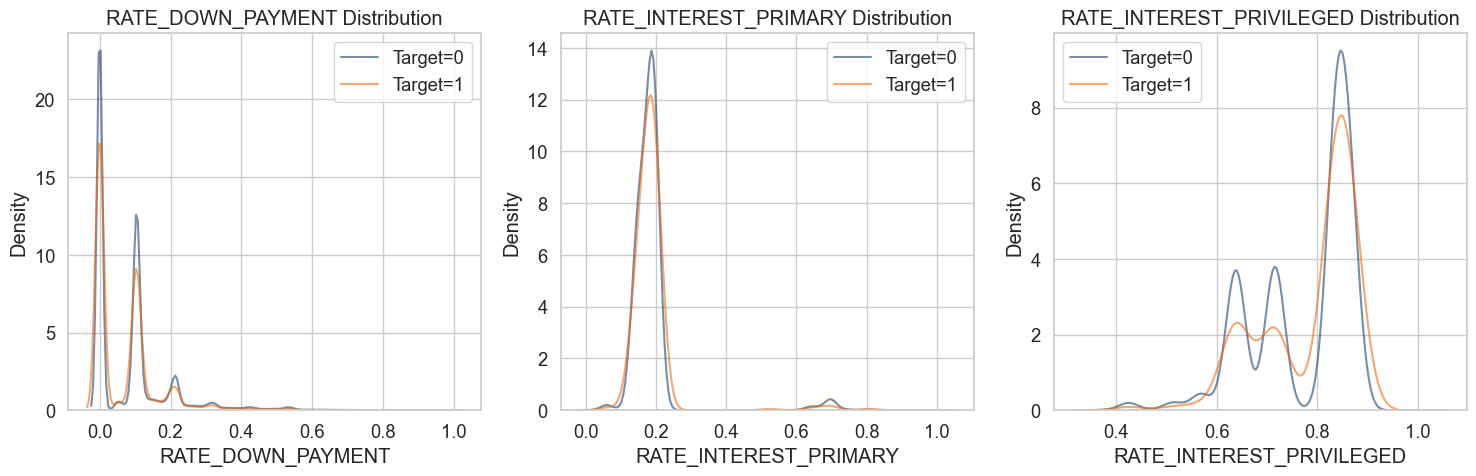

In [30]:
plt.figure(figsize=(15, 5))

for i, attr in enumerate(num_line, 1):
    plt.subplot(1, 3, i)
    target_0 = filtered_prev_app.loc[filtered_prev_app['TARGET'] == 0, attr].dropna()
    target_1 = filtered_prev_app.loc[filtered_prev_app['TARGET'] == 1, attr].dropna()

    sns.kdeplot(target_0, color='#1B436E', label='Target=0', alpha=0.6)
    sns.kdeplot(target_1, color='#EC6C14', label='Target=1', alpha=0.6)

    plt.title(f'{attr} Distribution')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


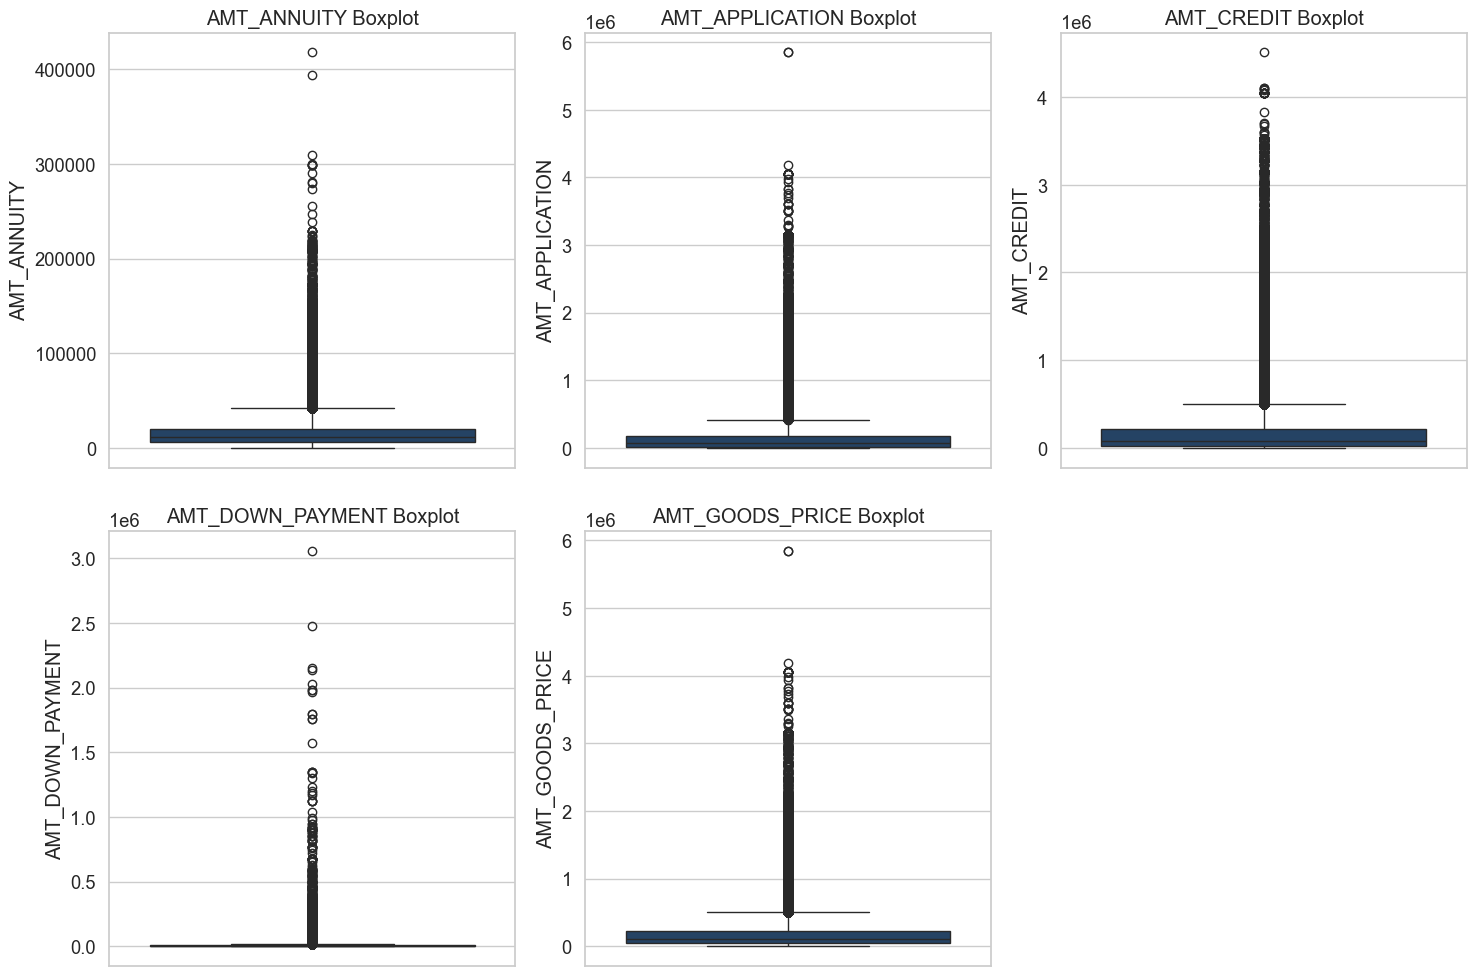

In [31]:
plt.figure(figsize=(15, 10))

for i, attr in enumerate(num_boxplot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=filtered_prev_app, y=attr, color='#1B436E')
    plt.title(f'{attr} Boxplot')
    plt.ylabel(attr)

plt.tight_layout()
plt.show()


## 4. Deeper Visualization (Multiple Variate)

**application_train + previous_application**

In [32]:
appli_prev_app = app_train[['SK_ID_CURR', 'TARGET']]
appli_prev_app = pd.merge(left=appli_prev_app, right=prev_app, how='left', on='SK_ID_CURR')
appli_prev_app.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,278621,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1,278621,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
2,278621,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,139008,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,15.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-181.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
4,139008,0,2827850.0,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,15.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,-181.0,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
len(appli_prev_app[appli_prev_app['SK_ID_PREV'].isnull()])

13183

In [34]:
target_dist = appli_prev_app.groupby(['SK_ID_CURR', 'TARGET']).agg({'SK_ID_PREV': 'count'})
target_dist.rename(columns={'SK_ID_PREV': 'count'}, inplace=True)
target_dist = target_dist.reset_index()
target_dist.head()

,SK_ID_CURR,TARGET,count
0,0,0,6
1,1,1,7
2,2,0,4
3,3,0,6
4,4,0,1


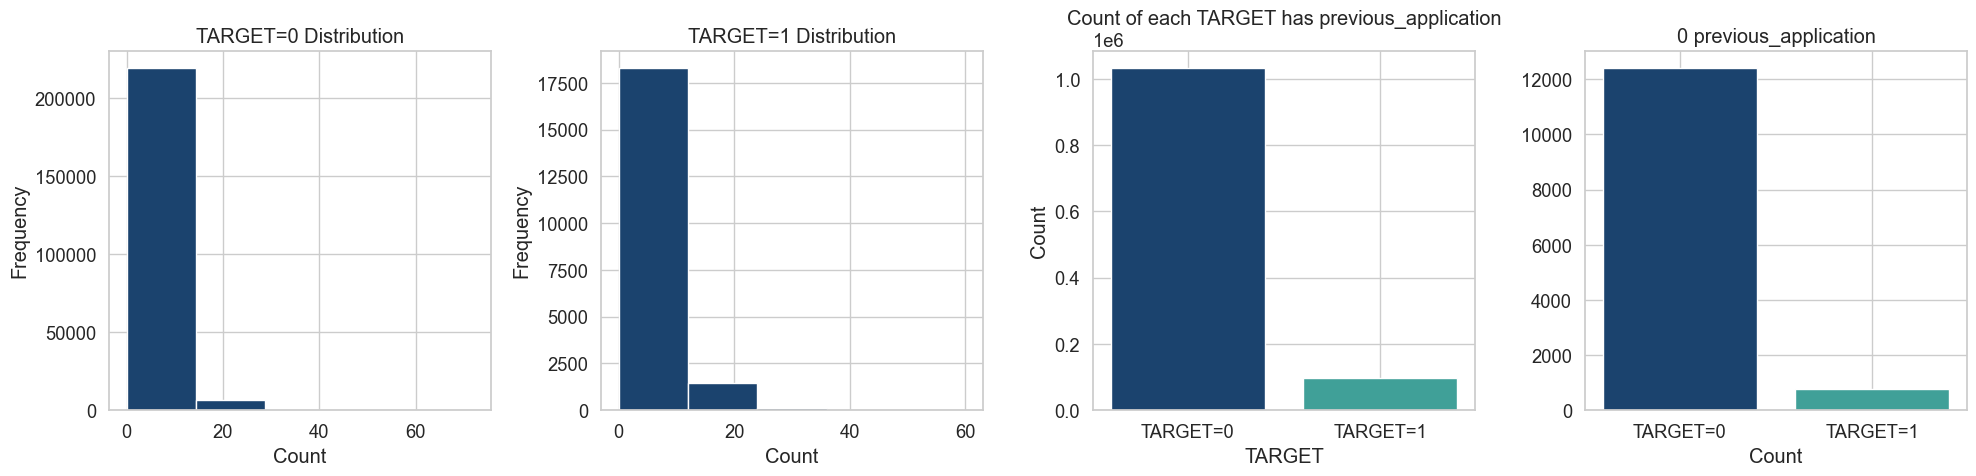

In [35]:
target0 = target_dist[(target_dist['TARGET'] == 0)] #Dist of TARGET=0
target1 = target_dist[(target_dist['TARGET'] == 1)] #Dist of TARGET=1
target_count = filtered_prev_app['TARGET'].value_counts() #Count of each TARGET has previous_application
target_01 = target_dist[target_dist['count'] == 0]

'''
Ý tưởng:
Tổng quan
    Xem ở trong TARGET=0 số lượng previous_application là ntn
    Xem ở trong TARGET=1 số lượng previous_application là ntn
Chi tiết
    Số lượng người có 0 previous_application thì số lượng TARGET là ntn
'''

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.hist(target0['count'], bins=5, color='#1B436E')
plt.title('TARGET=0 Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
plt.hist(target1['count'], bins=5, color='#1B436E')
plt.title('TARGET=1 Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.bar(target_count.index, target_count.values, color=['#1B436E', '#40A098'])
plt.title('Count of each TARGET has previous_application')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.xticks([0, 1], ['TARGET=0', 'TARGET=1'])

plt.subplot(1, 4, 4)
plt.bar(['TARGET=0', 'TARGET=1'], [(target_01['TARGET'] == 0).sum(), (target_01['TARGET'] == 1).sum()], color=['#1B436E', '#40A098'])
plt.title('0 previous_application')
plt.xlabel('Count')

plt.tight_layout()
plt.show()


#### Comment:
- THe dataset is imbalanced: should oversampling or undersampling 

### c. Check duplicate and missing values

In [36]:
prev_app[prev_app.duplicated(keep=False)]

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR


In [37]:
#Count categorical null values
null_categorical = prev_app[categorical_col].isnull().sum()
null_categorical[null_categorical > 0].sort_values(ascending=False)

NAME_TYPE_SUITE        694672
PRODUCT_COMBINATION       313
dtype: int64

In [38]:
#Count numerical null values
null_numerical = prev_app[numerical_col].isnull().sum()
null_numerical[null_numerical > 0].sort_values(ascending=False)

RATE_INTEREST_PRIMARY        1408910
RATE_INTEREST_PRIVILEGED     1408910
AMT_DOWN_PAYMENT              749540
RATE_DOWN_PAYMENT             749540
DAYS_FIRST_DRAWING            561106
DAYS_FIRST_DUE                561106
DAYS_LAST_DUE_1ST_VERSION     561106
DAYS_LAST_DUE                 561106
DAYS_TERMINATION              561106
NFLAG_INSURED_ON_APPROVAL     561106
AMT_GOODS_PRICE               319525
AMT_ANNUITY                   307218
CNT_PAYMENT                   307213
AMT_CREDIT                         1
dtype: int64

In [39]:
#Percentage of null
missing_percent = prev_app.isnull().sum()/prev_app.shape[0]*100
missing_percent[missing_percent > 0].sort_values(ascending=False)

RATE_INTEREST_PRIMARY        99.661102
RATE_INTEREST_PRIVILEGED     99.661102
AMT_DOWN_PAYMENT             53.019698
RATE_DOWN_PAYMENT            53.019698
NAME_TYPE_SUITE              49.138538
DAYS_FIRST_DRAWING           39.690571
DAYS_FIRST_DUE               39.690571
DAYS_LAST_DUE_1ST_VERSION    39.690571
DAYS_LAST_DUE                39.690571
DAYS_TERMINATION             39.690571
NFLAG_INSURED_ON_APPROVAL    39.690571
AMT_GOODS_PRICE              22.602021
AMT_ANNUITY                  21.731469
CNT_PAYMENT                  21.731116
PRODUCT_COMBINATION           0.022140
AMT_CREDIT                    0.000071
dtype: float64

#### Comment:
- Nên tìm cách drop hoặc fill các feature có các % null qúa lớn này

## Overall Comment after EDA

- There are few Continuous Numerical Variables chứa các giá trị sai (không hợp lý) -> drop các giá trị này
- Gộp hoặc xoá các feature high related đến nhau để giảm chiều dữ liệu cũng như để lại cx k có ý nghĩa gì lắm
- Tạo thêm các feature mới từ các feature cũ
- Không thể xoá các điểm outliner hoặc kì dị vì đặc điểm của mấy ông Defaulter hay có 